## Data Manipulation

This file is responsible for importing the trillion different csv files and preparing the data for analysis. At the end of this file, the resulting dataframe is exported as a csv and used later for analysis. 


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline


In [2]:
# read in all of the data: regular season compact, regular season detailed, seasons, teams
# tourney compact, tourney detailed, tourney seeds, tourney slots 
regcompact = pd.read_csv("RegularSeasonCompactResults.csv")
regdetailed = pd.read_csv("RegularSeasonDetailedResults.csv")
seasons = pd.read_csv("Seasons.csv")
teams = pd.read_csv("Teams.csv")
tourneycompact = pd.read_csv("TourneyCompactResults.csv")
tourneydetailed = pd.read_csv("TourneyDetailedResults.csv")
tourneyseeds = pd.read_csv("TourneySeeds.csv")
tourneyslots = pd.read_csv("TourneySlots.csv")
kenpom = pd.read_csv("KenPomCSV0316.csv")

In [3]:
# Create an ID for the winning and losing teams in the regular detailed and tourney detailed 

regdetailed['WteamID'] = regdetailed['Wteam'].map(str) + regdetailed['Season'].map(str)
regdetailed['LteamID'] = regdetailed['Lteam'].map(str) + regdetailed['Season'].map(str)

tourneydetailed['WteamID'] = tourneydetailed['Wteam'].map(str) + tourneydetailed['Season'].map(str)
tourneydetailed['LteamID'] = tourneydetailed['Lteam'].map(str) + tourneydetailed['Season'].map(str)

In [4]:
# Add the Seed for Each Team

for i in range(0,len(tourneydetailed)):

    tourneydetailed.ix[i,"LKen_Name"] = teams['Ken_Name'][teams['Team_Id']==tourneydetailed.ix[i,'Lteam']].values[0]
    tourneydetailed.ix[i,"WKen_Name"] = teams['Ken_Name'][teams['Team_Id']==tourneydetailed.ix[i,'Wteam']].values[0]
    

In [5]:
# there were two names that changed over the years

tourneydetailed.ix[32,"LKen_Name"] = "Troy St."
tourneydetailed.ix[647,"LKen_Name"] = "Middle Tennessee"


In [6]:
tourneydetailed["WKen_Name_ID"] = tourneydetailed['WKen_Name'].map(str) + tourneydetailed['Season'].map(str)
tourneydetailed["LKen_Name_ID"] = tourneydetailed['LKen_Name'].map(str) + tourneydetailed['Season'].map(str)

In [7]:
# merge the kenpom data with the tournament data 

for i in range(0,len(tourneydetailed)):
    tourneydetailed.ix[i,"LKen"] = kenpom['EM'][(kenpom['TeamName']==tourneydetailed.ix[i,'LKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    tourneydetailed.ix[i,"WKen"] = kenpom['EM'][(kenpom['TeamName']==tourneydetailed.ix[i,'WKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    
    tourneydetailed.ix[i,"LAdjDE"] = kenpom['AdjDE'][(kenpom['TeamName']==tourneydetailed.ix[i,'LKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    tourneydetailed.ix[i,"WAdjDE"] = kenpom['AdjDE'][(kenpom['TeamName']==tourneydetailed.ix[i,'WKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    
    tourneydetailed.ix[i,"LAdjOE"] = kenpom['AdjOE'][(kenpom['TeamName']==tourneydetailed.ix[i,'LKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    tourneydetailed.ix[i,"WAdjOE"] = kenpom['AdjOE'][(kenpom['TeamName']==tourneydetailed.ix[i,'WKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    
    tourneydetailed.ix[i,"LTempo"] = kenpom['AdjTempo'][(kenpom['TeamName']==tourneydetailed.ix[i,'LKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    tourneydetailed.ix[i,"WTempo"] = kenpom['AdjTempo'][(kenpom['TeamName']==tourneydetailed.ix[i,'WKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    
    tourneydetailed.ix[i,"LDERank"] = kenpom['RankAdjDE'][(kenpom['TeamName']==tourneydetailed.ix[i,'LKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    tourneydetailed.ix[i,"WDERank"] = kenpom['RankAdjDE'][(kenpom['TeamName']==tourneydetailed.ix[i,'WKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    
    tourneydetailed.ix[i,"LOERank"] = kenpom['RankAdjOE'][(kenpom['TeamName']==tourneydetailed.ix[i,'LKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    tourneydetailed.ix[i,"WOERank"] = kenpom['RankAdjOE'][(kenpom['TeamName']==tourneydetailed.ix[i,'WKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    
    #tourneydetailed.ix[i,"LExp"] = kenpom['Exp'][(kenpom['TeamName']==tourneydetailed.ix[i,'LKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    #tourneydetailed.ix[i,"WExp"] = kenpom['Exp'][(kenpom['TeamName']==tourneydetailed.ix[i,'WKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    
    #tourneydetailed.ix[i,"LBench"] = kenpom['Bench'][(kenpom['TeamName']==tourneydetailed.ix[i,'LKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    #tourneydetailed.ix[i,"WBench"] = kenpom['Bench'][(kenpom['TeamName']==tourneydetailed.ix[i,'WKen_Name']) & (kenpom['Year']==tourneydetailed.ix[i,'Season'])].values[0]
    
    

In [8]:
# Create a Team_ID for the tourneyseed

tourneyseeds['Team_Id'] = tourneyseeds['Team'].map(str) + tourneyseeds['Season'].map(str)

for i in range(len(tourneyseeds)):
    tourneyseeds.ix[i,'SeedNum'] = int(tourneyseeds.ix[i,'Seed'][1:3])

In [9]:

# Add the Seed for Each Team

for i in range(0,len(tourneydetailed)):

    tourneydetailed.ix[i,"LSeed"] = tourneyseeds['Seed'][tourneyseeds['Team_Id']==tourneydetailed.ix[i,'LteamID']].values[0]
    tourneydetailed.ix[i,"WSeed"] = tourneyseeds['Seed'][tourneyseeds['Team_Id']==tourneydetailed.ix[i,'WteamID']].values[0]


In [10]:
# Get the No. seed from the total seed 

for i in range(0,len(tourneydetailed)):
    if (len(tourneydetailed.ix[i,"WSeed"])==3):
        tourneydetailed.ix[i,"WSeedNum"] = int(tourneydetailed.ix[i,"WSeed"][-2:])
    else: 
        tourneydetailed.ix[i,"WSeedNum"] = int(tourneydetailed.ix[i,"WSeed"][1:3])
    if (len(tourneydetailed.ix[i,"LSeed"])==3):
        tourneydetailed.ix[i,"LSeedNum"] = int(tourneydetailed.ix[i,"LSeed"][-2:])
    else: 
        tourneydetailed.ix[i,"LSeedNum"] = int(tourneydetailed.ix[i,"LSeed"][1:3])

In [11]:
# some of these are the "play-in" games (like 16 vs. 16). just making a note of those

for i in range(0,len(tourneydetailed)):
    if (tourneydetailed.ix[i,"WSeed"][0:3]==tourneydetailed.ix[i,"LSeed"][0:3]):
        tourneydetailed.ix[i,"Play-In"] = 1
    else:
        tourneydetailed.ix[i,"Play-In"] = 0

In [12]:
# calculate how many field goals they assist on 

regdetailed['Wastratio'] = regdetailed['Wast'] / regdetailed['Wfgm']
regdetailed['Lastratio'] = regdetailed['Last'] / regdetailed['Lfgm']

In [13]:
# calculate dr rate

regdetailed['Wdrratio'] = 1 / ((regdetailed['Lfga'] - regdetailed['Lfgm']) / regdetailed['Wdr'])
regdetailed['Ldrratio'] = 1 / ((regdetailed['Wfga'] - regdetailed['Wfgm']) / regdetailed['Ldr'])

In [14]:
# calculate or rate 

regdetailed['Worratio'] = 1 / ((regdetailed['Wfga'] - regdetailed['Wfgm']) / regdetailed['Wor'])
regdetailed['Lorratio'] = 1 / ((regdetailed['Lfga'] - regdetailed['Lfgm']) / regdetailed['Lor'])

In [15]:
# calculate point diff

regdetailed['ptdiff'] = ((regdetailed['Wscore'] - regdetailed['Lscore']))

In [16]:
# calc 2pt fg %, 3pt fg %

regdetailed['W2fgper'] = (regdetailed['Wfgm'] - regdetailed['Wfgm3']) / (regdetailed['Wfga'] - regdetailed['Wfga3'])
regdetailed['W3fgper'] = (regdetailed['Wfgm3'] / regdetailed['Wfga3'])

regdetailed['L2fgper'] = (regdetailed['Lfgm'] - regdetailed['Lfgm3']) / (regdetailed['Lfga'] - regdetailed['Lfga3'])
regdetailed['L3fgper'] = (regdetailed['Lfgm3'] / regdetailed['Lfga3'])

regdetailed['W3fgshot'] = regdetailed['Wfga3'] / (regdetailed['Wfga3'] + (regdetailed['Wfga'] - regdetailed['Wfga3']) +regdetailed['Wfta'])
regdetailed['Wftshot'] = regdetailed['Wfta'] / (regdetailed['Wfga3'] + (regdetailed['Wfga'] - regdetailed['Wfga3']) +regdetailed['Wfta'])

regdetailed['L3fgshot'] = regdetailed['Lfga3'] / (regdetailed['Lfga3'] + (regdetailed['Lfga'] - regdetailed['Lfga3']) +regdetailed['Lfta'])
regdetailed['Lftshot'] = regdetailed['Lfta'] / (regdetailed['Lfga3'] + (regdetailed['Lfga'] - regdetailed['Lfga3']) +regdetailed['Lfta'])




    


In [17]:
# designates round in tournament for each game

for i in range(0,len(tourneydetailed)):
    if (tourneydetailed.ix[i,"Play-In"]==1):
        tourneydetailed.ix[i,'round'] = 0
    elif ((tourneydetailed.ix[i,"Daynum"]==136) or (tourneydetailed.ix[i,"Daynum"]==137)):
        tourneydetailed.ix[i,'round'] = 1
    elif ((tourneydetailed.ix[i,"Daynum"]==138) or (tourneydetailed.ix[i,"Daynum"]==139)):
        tourneydetailed.ix[i,'round'] = 2
    elif ((tourneydetailed.ix[i,"Daynum"]==143) or (tourneydetailed.ix[i,"Daynum"]==144)):
        tourneydetailed.ix[i,'round'] = 3
    elif ((tourneydetailed.ix[i,"Daynum"]==145) or (tourneydetailed.ix[i,"Daynum"]==146)):
        tourneydetailed.ix[i,'round'] = 4
    elif (tourneydetailed.ix[i,"Daynum"]==152):
        tourneydetailed.ix[i,'round'] = 5
    elif (tourneydetailed.ix[i,"Daynum"]==154):
        tourneydetailed.ix[i,'round'] = 6
    




In [18]:
all_tourney_teamIDs = pd.Series(np.concatenate((tourneydetailed['WteamID'].unique(),tourneydetailed['LteamID'].unique()),axis=0)).unique()

#
# takes team ID, regular season data, and tournament data
#
#
# returns two fractions

def team_performance_lookup (teamID, regdetailed, tourneydetailed):
    # creates empty dataframe
    df = pd.DataFrame()
    
    # these are the IDs of every tournament team that this team beat 
    good_wins = regdetailed[regdetailed['WteamID'].isin([teamID])]['LteamID']
    
    # these are the IDs of every tournament team that beat this team
    meh_losses = regdetailed[regdetailed['LteamID'].isin([teamID])]['WteamID']
    
    # want to selected second column b/c first is index
    # calculates for 
    good_win_seeds = tourneyseeds['SeedNum'][tourneyseeds['Team_Id'].isin(good_wins)]

    # combines the wins together, takes only the seed number
    good_win_seeds = good_win_seeds.map(lambda x: float(1) / int(x))
        
    meh_losses_seeds = tourneyseeds['SeedNum'][tourneyseeds['Team_Id'].isin(meh_losses)]
    
    meh_losses_seeds = meh_losses_seeds.map(lambda x: float(1) / int(x))
    
    good_win_sum = np.sum(good_win_seeds)**.5
    meh_losses_sum = np.sum(meh_losses_seeds)**.5
    
    #print good_wins.shape
    return teamID, good_win_sum, meh_losses_sum

teams_seeded_wins = []


for team in all_tourney_teamIDs:
    teams_seeded_wins.append(team_performance_lookup(team, regdetailed, tourneydetailed))
    
print teams_seeded_wins

teams_seeded_wins = pd.DataFrame(teams_seeded_wins, columns = ['ID', 'good_win', 'meh_losses'])

[('14212003', 0.0, 1.4074631010979934), ('11122003', 1.475439960460295, 0.6123724356957945), ('11132003', 0.6871842709362768, 1.6414763002993509), ('11412003', 0.0, 0.0), ('11432003', 0.689202437604511, 1.3601470508735443), ('11632003', 0.8139410298049853, 1.224744871391589), ('11812003', 1.0540925533894598, 0.8819171036881969), ('12112003', 0.6132441406718666, 1.2698965952538666), ('12282003', 0.8737803290828098, 0.8600479868487221), ('12422003', 1.3301071316570638, 1.7004901254246279), ('12662003', 1.036822067666386, 0.8366600265340756), ('12812003', 1.4094136676103601, 1.8303005217723127), ('13232003', 1.4361406616345072, 1.4832396974191324), ('13282003', 1.1570179238847063, 1.2780193008453877), ('13902003', 1.514742369000235, 1.118033988749895), ('14092003', 0.0, 0.7817359599705717), ('14582003', 0.8255589736945623, 1.092906420717), ('11202003', 0.5991064775384851, 1.4148933093781584), ('11392003', 0.40032038451271784, 0.6454972243679028), ('11962003', 1.091634859587521, 1.17260393

In [19]:
tourneydetailed = tourneydetailed[tourneydetailed['round'] > 0]

tourneydetailed = tourneydetailed.reset_index(drop=True)

In [20]:
# use this as a key to bring statistics into a prediction matrix

winstats = ['Wscore', 'W2fgper', 'W3fgper','Wor','Wdr','Wast','Wto','Wstl','Wblk','Wpf','Wastratio','Wdrratio','Worratio','W3fgshot','Wftshot','Lscore', 'L2fgper', 'L3fgper','Lor','Ldr','Last','Lto','Lstl','Lblk','Lpf','Lastratio','Ldrratio','Lorratio','L3fgshot','Lftshot']
losestats = ['Lscore', 'L2fgper', 'L3fgper','Lor','Ldr','Last','Lto','Lstl','Lblk','Lpf','Lastratio','Ldrratio','Lorratio','L3fgshot','Lftshot','Wscore', 'W2fgper', 'W3fgper','Wor','Wdr','Wast','Wto','Wstl','Wblk','Wpf','Wastratio','Wdrratio','Worratio','W3fgshot','Wftshot']
col_names = ['scorefor','2fgperfor', '3fgperfor','orfor','drfor','astfor','tofor','stlfor','blkfor','pffor','astratiofor','drratiofor','orratiofor','pot3ptsfor','potftptsfor','scoreag','2fgperag', '3fgperag','orag','drag','astag','toag','stlag','blkag','pfag','astratioag','drratioag','orratioag','pot3ptsag','potftptsag']

d = {'winstats': winstats, 'losestats': losestats,'col_names': col_names}
key = pd.DataFrame(data=d)


In [21]:
# accumulate reg season stats of winner, loser

new_tourney_stats_winner = pd.DataFrame(np.zeros((len(tourneydetailed),30)))
new_tourney_stats_loser = pd.DataFrame(np.zeros((len(tourneydetailed),30)))

for i in range(0,len(new_tourney_stats_winner)):
    for j in range(0,30):
        new_tourney_stats_winner.iloc[i,j] = np.mean(np.append(regdetailed[key.iloc[j,2]]
                                            [(regdetailed['Wteam']==tourneydetailed.ix[i,'Wteam']) & 
                                           (regdetailed['Season']==tourneydetailed.ix[i,'Season'])],
                                            regdetailed[key.iloc[j,1]]
                                            [(regdetailed['Lteam']==tourneydetailed.ix[i,'Wteam']) & 
                                           (regdetailed['Season']==tourneydetailed.ix[i,'Season'])]))

for i in range(0,len(new_tourney_stats_loser)):
    for j in range(0,30):
        new_tourney_stats_loser.iloc[i,j] = np.mean(np.append(regdetailed[key.iloc[j,2]]
                                            [(regdetailed['Wteam']==tourneydetailed.ix[i,'Lteam']) & 
                                           (regdetailed['Season']==tourneydetailed.ix[i,'Season'])],
                                            regdetailed[key.iloc[j,1]]
                                            [(regdetailed['Lteam']==tourneydetailed.ix[i,'Lteam']) & 
                                           (regdetailed['Season']==tourneydetailed.ix[i,'Season'])]))


In [22]:
# we want to determine failures and successes. Therefore, we will call a game a success if the higher ranked team wins 
# so, we have to reorganize data from winning seed and losing seed to high seed and low seed

prediction_matrix = pd.DataFrame(np.zeros((len(tourneydetailed),76)))

for i in range(0,len(tourneydetailed)):
    if(tourneydetailed.ix[i,"WSeedNum"] > tourneydetailed.ix[i,"LSeedNum"]):
        x = pd.concat([new_tourney_stats_loser.iloc[i,:], pd.Series(tourneydetailed.ix[i,'LKen'])
                       ,pd.Series(tourneydetailed.ix[i,'LAdjOE']),
                       pd.Series(tourneydetailed.ix[i,'LAdjDE']),pd.Series(tourneydetailed.ix[i,'LTempo']),
                       pd.Series(tourneydetailed.ix[i,'LDERank']),pd.Series(tourneydetailed.ix[i,'LOERank']),
                       #pd.Series(tourneydetailed.ix[i,'LSeedNum']**.5),
                       pd.Series(np.array(teams_seeded_wins.iloc[:,range(1,3)][teams_seeded_wins.iloc[:,0]==tourneydetailed.ix[i,"LteamID"]].values).reshape(2,)),
                       new_tourney_stats_winner.iloc[i,:],
                       pd.Series(tourneydetailed.ix[i,'WKen']),pd.Series(tourneydetailed.ix[i,'WAdjOE']),
                       pd.Series(tourneydetailed.ix[i,'WAdjDE']),pd.Series(tourneydetailed.ix[i,'WTempo']),
                       pd.Series(tourneydetailed.ix[i,'WDERank']),pd.Series(tourneydetailed.ix[i,'WOERank']),
                      # pd.Series(tourneydetailed.ix[i,'WSeedNum']**.5),
                      pd.Series(np.array(teams_seeded_wins.iloc[:,range(1,3)][teams_seeded_wins.iloc[:,0]==tourneydetailed.ix[i,"WteamID"]].values).reshape(2,))], axis=0)
        prediction_matrix.iloc[i,:] = np.array(x)
        prediction_matrix = pd.DataFrame(prediction_matrix)
    else:
        x = pd.concat([new_tourney_stats_winner.iloc[i,:], 
               pd.Series(tourneydetailed.ix[i,'WKen']),pd.Series(tourneydetailed.ix[i,'WAdjOE']),
               pd.Series(tourneydetailed.ix[i,'WAdjDE']),pd.Series(tourneydetailed.ix[i,'WTempo']),
                pd.Series(tourneydetailed.ix[i,'WDERank']),pd.Series(tourneydetailed.ix[i,'WOERank']),
                        #pd.Series(tourneydetailed.ix[i,'WSeedNum']**.5),
                       pd.Series(np.array(teams_seeded_wins.iloc[:,range(1,3)][teams_seeded_wins.iloc[:,0]==tourneydetailed.ix[i,"WteamID"]].values).reshape(2,)),
               new_tourney_stats_loser.iloc[i,:],
               pd.Series(tourneydetailed.ix[i,'LKen']),pd.Series(tourneydetailed.ix[i,'LAdjOE']),
               pd.Series(tourneydetailed.ix[i,'LAdjDE']),pd.Series(tourneydetailed.ix[i,'LTempo']),
                pd.Series(tourneydetailed.ix[i,'LDERank']),pd.Series(tourneydetailed.ix[i,'LOERank']),
              #pd.Series(tourneydetailed.ix[i,'LSeedNum']**.5),
                pd.Series(np.array(teams_seeded_wins.iloc[:,range(1,3)][teams_seeded_wins.iloc[:,0]==tourneydetailed.ix[i,"LteamID"]].values).reshape(2,))], axis=0)
        prediction_matrix.iloc[i,:] = np.array(x)
        prediction_matrix = pd.DataFrame(prediction_matrix)    
        
from sklearn import preprocessing
prediction_matrix = preprocessing.scale(prediction_matrix)
prediction_matrix = pd.DataFrame(prediction_matrix)

        
prediction_matrix = pd.DataFrame(prediction_matrix)    
prediction_matrix.columns = ['team1scorefor','team12fgperfor', 'team13fgperfor','team1orfor','team1drfor','team1astfor','team1tofor','team1stlfor','team1blkfor','team1pffor','team1astratiofor','team1drratiofor','team1orratiofor','team1pot3ptsfor','team1potftptsfor','team1scoreag','team12fgperag', 'team13fgperag','team1orag','team1drag','team1astag','team1toag','team1stlag','team1blkag','team1pfag','team1astratioag','team1drratioag','team1orratioag','team1pot3ptsag','team1potftptsag',
                             'team1ken', 'team1kenoe','team1kende', 'team1kentempo','team1drank','team1orank',
                             #,'team1seed',
                             'team1goodwins','team1goodlosses',
                           'team2scorefor','team22fgperfor', 'team23fgperfor','team2orfor','team2drfor','team2astfor','team2tofor','team2stlfor','team2blkfor','team2pffor','team2astratiofor','team2drratiofor','team2orratiofor','team2pot3ptsfor','team2potftptsfor','team2scoreag','team22fgperag', 'team23fgperag','team2orag','team2drag','team2astag','team2toag','team2stlag','team2blkag','team2pfag','team2astratioag','team2drratioag','team2orratioag','team2pot3ptsag','team2potftptsag',
                            'team2ken', 'team2kenoe','team2kende', 'team2kentempo','team2drank','team2orank',
                            #'team2seed',
                            'team2goodwins','team2goodlosses']


# this is for classification
    
prediction_answers =pd.DataFrame(np.ones((len(tourneydetailed),1)))  
for i in range(0,len(tourneydetailed)):
    if(tourneydetailed.ix[i,"WSeedNum"]>tourneydetailed.ix[i,"LSeedNum"]):
        prediction_answers.iloc[i,0] = 0
        
# this is for point differential

#
# I assume a positive differential means that the lower seeded (better team) won?
#
        
prediction_answers2 =pd.DataFrame(np.zeros((len(tourneydetailed),1)))  
for i in range(0,len(tourneydetailed)):
    if(tourneydetailed.ix[i,"WSeedNum"]<tourneydetailed.ix[i,"LSeedNum"]):
        prediction_answers2.iloc[i,0] = tourneydetailed.ix[i,"Wscore"] - tourneydetailed.ix[i,"Lscore"]
    else:
        prediction_answers2.iloc[i,0] = tourneydetailed.ix[i,"Lscore"] - tourneydetailed.ix[i,"Wscore"]

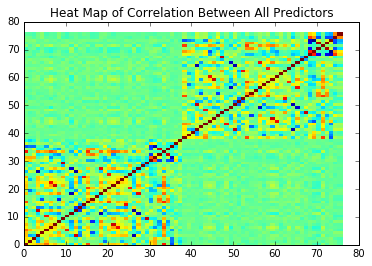

In [23]:
cor_matrix = np.ones((prediction_matrix.shape[1],prediction_matrix.shape[1]))

# calculate correlations for each pair, put in respective positions in matrix 

for i in range(prediction_matrix.shape[1]-1):
    for j in range(i+1,prediction_matrix.shape[1]):
        cor_matrix[i,j] = round(np.corrcoef(prediction_matrix.iloc[:,i],prediction_matrix.iloc[:,j])[0,1],2)
        cor_matrix[j,i] = round(np.corrcoef(prediction_matrix.iloc[:,i],prediction_matrix.iloc[:,j])[0,1],2)
    
# add row and column labels
    
cor_matrix = pd.DataFrame(cor_matrix, columns=prediction_matrix.columns.values)

#  print cor_matrix.iloc[28,range(20,70)]

# Plot the Color Map (using the pcolor fucntion from lab)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolor(cor_matrix)
ax.set_title("Heat Map of Correlation Between All Predictors")


# saves file for use in poster
plt.savefig('all_predictors')

plt.show()

In [24]:
#
# Check for multicollinearity by caluclating variance inflation factor
#

def vif(x_matrix):
    score = [0] * x_matrix.shape[1]
    for i in range(x_matrix.shape[1]):
        y_vals = x_matrix.iloc[:,i]
        x_vals = x_matrix.drop(x_matrix.columns[i],axis=1)
        regression = Lin_Reg()
        regression.fit(x_vals, y_vals)
        # print r2 for train and test 
        r2 = regression.score(x_vals, y_vals)
        score[i] = 1 / (1-r2)
    return score



In [25]:
print prediction_matrix.shape
vif_vals = vif(prediction_matrix)

for i in range(prediction_matrix.shape[1]):
    if (vif_vals[i]>1000):
        print prediction_matrix.columns[i]

(819, 76)
team1ken
team1kenoe
team1kende
team2ken
team2kenoe
team2kende


In [26]:

prediction_matrix = prediction_matrix.drop(['team1ken','team2ken'],axis=1)

In [27]:
print prediction_matrix.shape
vif_vals = vif(prediction_matrix)

for i in range(prediction_matrix.shape[1]):
    if (vif_vals[i]>50):
        print prediction_matrix.columns[i]

(819, 74)
team1scorefor
team1orfor
team1drfor
team1astfor
team1astratiofor
team1orratiofor
team1scoreag
team1orag
team1drag
team1astag
team1astratioag
team1orratioag
team2scorefor
team2orfor
team2drfor
team2astfor
team2astratiofor
team2orratiofor
team2scoreag
team2orag
team2drag
team2astag
team2astratioag


In [28]:
prediction_matrix = prediction_matrix.drop(['team1scorefor','team1scoreag','team1orfor','team1orag','team2scorefor','team2scoreag','team2orfor','team2orag'],axis=1)

In [29]:
print prediction_matrix.shape
vif_vals = vif(prediction_matrix)

for i in range(prediction_matrix.shape[1]):
    if (vif_vals[i]>50):
        print prediction_matrix.columns[i]

(819, 66)
team1drfor
team1astfor
team1astratiofor
team1astag
team1astratioag
team2astfor
team2astag


In [30]:
prediction_matrix = prediction_matrix.drop(['team1astfor','team1astag','team2astfor','team2astag'],axis=1)

In [31]:
print prediction_matrix.shape
vif_vals = vif(prediction_matrix)

for i in range(prediction_matrix.shape[1]):
    if (vif_vals[i]>20):
        print prediction_matrix.columns[i]

(819, 62)
team1drfor
team1drratiofor
team1drag
team1toag
team1drratioag
team1kentempo
team2drfor
team2drag
team2toag
team2drratioag
team2kenoe
team2kende


In [32]:

prediction_matrix = prediction_matrix.drop(['team1drank','team2drank','team1orank','team2orank'],axis=1)

In [33]:
print prediction_matrix.shape
vif_vals = vif(prediction_matrix)

for i in range(prediction_matrix.shape[1]):
    if (vif_vals[i]>20):
        print prediction_matrix.columns[i]

(819, 58)
team1drfor
team1drratiofor
team1drag
team1toag
team1drratioag
team1kentempo
team2drfor
team2drag
team2toag
team2drratioag


In [34]:
prediction_matrix = prediction_matrix.drop(['team1drfor','team1drag','team2drfor',
                                           'team2drag'                          
                                           ],axis=1)

In [35]:
print prediction_matrix.shape
vif_vals = vif(prediction_matrix)

for i in range(prediction_matrix.shape[1]):
    if (vif_vals[i]>20):
        print prediction_matrix.columns[i]

(819, 54)


In [36]:
def add_interaction(x_matrix, int_1, int_2, name):
    x_matrix[name] =  x_matrix[int_1] *  x_matrix[int_2]
    return x_matrix

In [37]:
prediction_matrix = add_interaction(prediction_matrix, 'team1kenoe', 'team2kende', 'team1orank+team2drank')
prediction_matrix = add_interaction(prediction_matrix, 'team2kenoe', 'team1kende', 'team2orank+team1drank')

# prediction_matrix = add_interaction(prediction_matrix, 'team1seed', 'team1seed', 'team1seed+team2seed')
 
#prediction_matrix = add_interaction(prediction_matrix, 'team1goodwins', 'team1goodlosses', 'team1goodwins+team1goodlosses')
#prediction_matrix = add_interaction(prediction_matrix, 'team2goodwins', 'team2goodlosses', 'team2goodwins+team2goodlosses')
#prediction_matrix = add_interaction(prediction_matrix, 'team2kentempo', 'team1drank', 'team2kentempo+team1drank')
#prediction_matrix = add_interaction(prediction_matrix, 'team1kentempo', 'team2drank', 'team1kentempo+team2drank')





In [38]:


prediction_matrix = prediction_matrix.drop(['team12fgperfor','team12fgperag',
                                           'team22fgperfor','team22fgperag',
                                           'team13fgperfor','team13fgperag',
                                           'team23fgperfor','team23fgperag',
                                           'team1pffor','team1pfag',
                                           'team2pffor','team2pfag',
                                            'team2stlfor','team2stlag',
                                            'team1stlfor','team1stlag',                                           
                                           ],axis=1)

In [39]:
prediction_matrix = prediction_matrix.drop(['team1blkfor', 'team1astratiofor','team1blkag','team1astratioag', 'team2blkfor', 'team2astratiofor','team2blkag','team2astratioag'],axis=1)


In [40]:
print prediction_matrix.shape
vif_vals = vif(prediction_matrix)

for i in range(prediction_matrix.shape[1]):
    if (vif_vals[i]>10):
        print prediction_matrix.columns[i]
        

(819, 32)


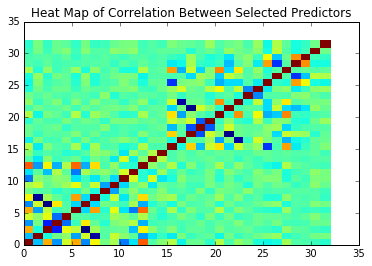

In [41]:
cor_matrix = np.ones((prediction_matrix.shape[1],prediction_matrix.shape[1]))

# calculate correlations for each pair, put in respective positions in matrix 

for i in range(prediction_matrix.shape[1]-1):
    for j in range(i+1,prediction_matrix.shape[1]):
        cor_matrix[i,j] = round(np.corrcoef(prediction_matrix.iloc[:,i],prediction_matrix.iloc[:,j])[0,1],2)
        cor_matrix[j,i] = round(np.corrcoef(prediction_matrix.iloc[:,i],prediction_matrix.iloc[:,j])[0,1],2)
    
# add row and column labels
    
cor_matrix = pd.DataFrame(cor_matrix, columns=prediction_matrix.columns.values)

#  print cor_matrix.iloc[28,range(20,70)]

# Plot the Color Map (using the pcolor fucntion from lab)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolor(cor_matrix)
ax.set_title("Heat Map of Correlation Between Selected Predictors")

# saves file for use in poster
plt.savefig('selected_predictors')

plt.show()



In [42]:
# adds years to prediction matrix
prediction_matrix['round'] = tourneydetailed['round']
prediction_matrix['Year'] = tourneydetailed['Season']

# adds two columns for point differential and win/loss
prediction_matrix['win_or_loss'] = prediction_answers
prediction_matrix['pt_diff'] = prediction_answers2


for i in range(0,len(tourneydetailed)):
    if(tourneydetailed.ix[i,"WSeedNum"] > tourneydetailed.ix[i,"LSeedNum"]):
        prediction_matrix.ix[i,'team1name'] = tourneydetailed.ix[i,'LKen_Name']
        prediction_matrix.ix[i,'team2name'] = tourneydetailed.ix[i,'WKen_Name']
        prediction_matrix.ix[i,'team1spot'] = tourneydetailed.ix[i,'LSeed']
        prediction_matrix.ix[i,'team2spot'] = tourneydetailed.ix[i,'WSeed']
    else: 
        prediction_matrix.ix[i,'team1name'] = tourneydetailed.ix[i,'WKen_Name']
        prediction_matrix.ix[i,'team2name'] = tourneydetailed.ix[i,'LKen_Name']
        prediction_matrix.ix[i,'team1spot'] = tourneydetailed.ix[i,'WSeed']
        prediction_matrix.ix[i,'team2spot'] = tourneydetailed.ix[i,'LSeed']

In [43]:
prediction_matrix.to_csv('pred_matrix2.csv', index_label = False)

**Prepping 2016 data**

In [44]:
seeds16 = tourneyseeds[(tourneyseeds['Season']==2016)]

seeds16 = seeds16[seeds16["Team"] != 1409]
seeds16 = seeds16[seeds16["Team"] != 1192]
seeds16 = seeds16[seeds16["Team"] != 1435]
seeds16 = seeds16[seeds16["Team"] != 1380]

seeds16 = seeds16.reset_index(drop=True)

for i in range(0, len(seeds16)):
    if (len(seeds16.ix[i,"Seed"]) == 4):
        seeds16.ix[i,"Seed"] = seeds16.ix[i,"Seed"][0:3]

In [45]:
kenpom.columns

Index([u'TeamName', u'Year', u'ID', u'Tempo', u'RankTempo', u'AdjTempo',
       u'RankAdjTempo', u'OE', u'RankOE', u'AdjOE', u'RankAdjOE', u'DE',
       u'RankDE', u'AdjDE', u'RankAdjDE', u'EM', u'RankEM', u'Exp', u'Bench'],
      dtype='object')

In [46]:
kenpom16 = kenpom[kenpom['Year']==2016]
kenpom16 = kenpom16.reset_index(drop=True)

In [47]:
seeds16.head(n=5), kenpom16.head(n=5)

(   Season Seed  Team   Team_Id  SeedNum
 0    2016  W01  1314  13142016      1.0
 1    2016  W02  1462  14622016      2.0
 2    2016  W03  1452  14522016      3.0
 3    2016  W04  1246  12462016      4.0
 4    2016  W05  1231  12312016      5.0,
          TeamName  Year                  ID    Tempo  RankTempo  AdjTempo  \
 0          Kansas  2016          Kansas2016  69.2473        157   69.2989   
 1    Michigan St.  2016    Michigan St.2016  67.0341        275   67.3384   
 2        Virginia  2016        Virginia2016  61.1656        351   61.8176   
 3  North Carolina  2016  North Carolina2016  70.7158         92   71.1770   
 4       Villanova  2016       Villanova2016  67.6994        243   67.6916   
 
    RankAdjTempo       OE  RankOE    AdjOE  RankAdjOE       DE  RankDE  \
 0           152  114.369      16  119.525          7  96.1366      29   
 1           262  118.599       3  122.380          1  93.7333      10   
 2           351  114.800      12  119.328          8  97.254

In [48]:
for i in range(64):
    seeds16.ix[i,'Ken_Name'] = teams['Ken_Name'][teams['Team_Id']==seeds16.ix[i,'Team']].values[0]

seeds16.ix[30,'Ken_Name'] = "Middle Tennessee"
        


In [49]:
# accumulate reg season stats of winner, loser

new_tourney_stats = pd.DataFrame(np.zeros((len(seeds16),30)))


for i in range(0,len(new_tourney_stats)):
    for j in range(0,30):
        new_tourney_stats.iloc[i,j] = np.mean(np.append(regdetailed[key.iloc[j,2]]
                                            [(regdetailed['WteamID']==seeds16.ix[i,'Team_Id'])],
                                            regdetailed[key.iloc[j,1]]
                                            [(regdetailed['LteamID']==seeds16.ix[i,'Team_Id'])]))




In [50]:
def team_performance_lookup2 (teamID, regdetailed):
    # creates empty dataframe
    df = pd.DataFrame()
    
    # these are the IDs of every tournament team that this team beat 
    good_wins = regdetailed[regdetailed['WteamID'].isin([teamID])]['LteamID']
    
    # these are the IDs of every tournament team that beat this team
    meh_losses = regdetailed[regdetailed['LteamID'].isin([teamID])]['WteamID']
    
    # want to selected second column b/c first is index
    # calculates for 
    good_win_seeds = tourneyseeds['SeedNum'][tourneyseeds['Team_Id'].isin(good_wins)]

    # combines the wins together, takes only the seed number
    good_win_seeds = good_win_seeds.map(lambda x: float(1) / int(x))
        
    meh_losses_seeds = tourneyseeds['SeedNum'][tourneyseeds['Team_Id'].isin(meh_losses)]
    
    meh_losses_seeds = meh_losses_seeds.map(lambda x: float(1) / int(x))
    
    good_win_sum = np.sum(good_win_seeds)**.5
    meh_losses_sum = np.sum(meh_losses_seeds)**.5
    
    #print good_wins.shape
    return teamID, good_win_sum, meh_losses_sum

teams_seeded_wins16 = []


for team in seeds16['Team_Id']:
    teams_seeded_wins16.append(team_performance_lookup2(team, regdetailed))
    
print teams_seeded_wins16

teams_seeded_wins16 = pd.DataFrame(teams_seeded_wins16, columns = ['ID', 'good_win', 'meh_losses'])

[('13142016', 1.5, 1.2939252004047315), ('14622016', 1.1656612860373436, 0.816496580927726), ('14522016', 1.4404860290887933, 1.632993161855452), ('12462016', 0.8211226608993472, 1.1934162828797101), ('12312016', 1.0028908431579397, 0.9918499048577026), ('13232016', 1.2123449260751742, 1.6532795690182993), ('14582016', 1.2268638087395052, 1.2649110640673518), ('14252016', 0.7802347299154491, 1.546886273407694), ('13442016', 0.8819171036881969, 1.2909944487358056), ('13382016', 0.7187952884282608, 1.591644851508443), ('12762016', 0.8755950357709131, 1.4130907249095497), ('11512016', 0.3779644730092272, 0.5), ('13922016', 0.0, 0.5075192189225523), ('13722016', 0.0, 0.5393598899705937), ('14512016', 0.28867513459481287, 0.28867513459481287), ('11952016', 0.0, 0.6454972243679028), ('14382016', 1.6683325008322931, 1.2583057392117916), ('12772016', 1.3945885934128908, 0.6969320524371696), ('14282016', 1.1333683467980784, 1.3479983557480948), ('12352016', 1.524925186819611, 1.6580839617590009

In [51]:
teamstats16 = pd.DataFrame(np.zeros((len(seeds16),38)))

for i in range(0,len(seeds16)):
    y = pd.concat([new_tourney_stats.iloc[i,:], 
    pd.Series(kenpom16['EM'][kenpom16['TeamName']==seeds16.ix[i,'Ken_Name']]),
    pd.Series(kenpom16['AdjOE'][kenpom16['TeamName']==seeds16.ix[i,'Ken_Name']]),
    pd.Series(kenpom16['AdjDE'][kenpom16['TeamName']==seeds16.ix[i,'Ken_Name']]),
    pd.Series(kenpom16['AdjTempo'][kenpom16['TeamName']==seeds16.ix[i,'Ken_Name']]),
    pd.Series(kenpom16['RankAdjDE'][kenpom16['TeamName']==seeds16.ix[i,'Ken_Name']]),
    pd.Series(kenpom16['RankAdjOE'][kenpom16['TeamName']==seeds16.ix[i,'Ken_Name']]),
    # pd.Series(int(seeds16.ix[i,'SeedNum'])**.5),
    pd.Series(np.array(teams_seeded_wins16.iloc[:,range(1,3)][teams_seeded_wins16.iloc[:,0]==seeds16.ix[i,"Team_Id"]].values).reshape(2,))], axis=0)
    teamstats16.iloc[i,:] = np.array(y)
teamstats16 = pd.DataFrame(teamstats16)                    

In [52]:
teamstats16.columns = ['team1scorefor','team12fgperfor', 'team13fgperfor','team1orfor','team1drfor','team1astfor','team1tofor','team1stlfor','team1blkfor','team1pffor','team1astratiofor','team1drratiofor','team1orratiofor','team1pot3ptsfor','team1potftptsfor','team1scoreag','team12fgperag', 'team13fgperag','team1orag','team1drag','team1astag','team1toag','team1stlag','team1blkag','team1pfag','team1astratioag','team1drratioag','team1orratioag','team1pot3ptsag','team1potftptsag',
                             'team1ken', 'team1kenoe','team1kende', 'team1kentempo','team1drank','team1orank',
                             #,'team1seed',
                             'team1goodwins','team1goodlosses']


In [53]:
teamstats16 = teamstats16.drop(['team1ken'],axis=1)
teamstats16 = teamstats16.drop(['team1scorefor','team1scoreag','team1orfor','team1orag'],axis=1)
teamstats16 = teamstats16.drop(['team1astfor','team1astag'],axis=1)
teamstats16 = teamstats16.drop(['team1kenoe','team1kende'],axis=1)

teamstats16 = teamstats16.drop(['team1drfor','team1drag'                        
                                           ],axis=1)

teamstats16 = teamstats16.drop(['team12fgperfor','team12fgperag',
                                           
                                           'team13fgperfor','team13fgperag',
                                           
                                           'team1pffor','team1pfag',
                                           
                                           
                                            'team1stlfor','team1stlag',                                           
                                           ],axis=1)

teamstats16 = teamstats16.drop(['team1blkfor', 'team1astratiofor','team1blkag','team1astratioag'],axis=1)


In [54]:
from sklearn import preprocessing
teamstats16 = preprocessing.scale(teamstats16)
teamstats16 = pd.DataFrame(teamstats16)

for i in range(0,len(seeds16)):
    teamstats16.ix[i,'team1name'] = seeds16.ix[i,'Ken_Name']
    teamstats16.ix[i,'team1spot'] = seeds16.ix[i,'Seed']

    




In [55]:
teamstats16.columns = ['team1tofor', 'team1drratiofor', 'team1orratiofor',
       'team1pot3ptsfor', 'team1potftptsfor', 'team1toag',
       'team1drratioag', 'team1orratioag', 'team1pot3ptsag',
       'team1potftptsag', 'team1kentempo', 'team1drank', 'team1orank',
       #'team1seed'
        'team1goodwins', 'team1goodlosses', 'team1name','team1spot']
teamstats16.to_csv('info2016.csv', index_label = False)